# High dimensional Gaussian with strong covariance structure

This distribution is a multivariate Gaussian with strong covariances ($\rho=0.5$ by default) between the dimensions, with variance in each dimension given by its row number.

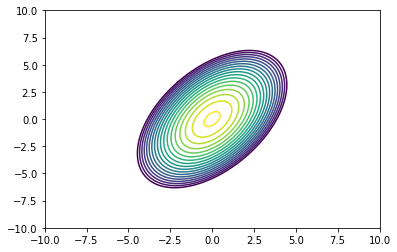

In [12]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.HighDimensionalGaussianLogPDF(dimension=2)

# Contour plot of pdf
levels = np.linspace(-12, -1, 20)
x = np.linspace(-10, 10, 250)
y = np.linspace(-10, 10, 250)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]
plt.contour(X, Y, Z, levels = levels)
plt.show()

We can also sample directly from this toy LogPDF, and add that to the visualisation:

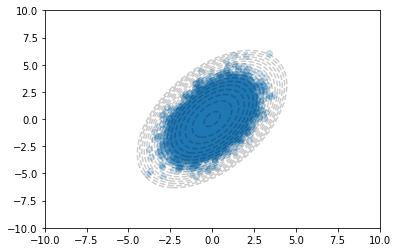

In [13]:
direct = log_pdf.sample(15000)

plt.figure()
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(direct[:, 0], direct[:, 1], alpha=0.2)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

We now try to sample from the distribution with MCMC:

In [14]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform(-25, 25, size=(3, 2))
mcmc = pints.MCMCSampling(log_pdf, 3, x0, method=pints.HaarioBardenetACMC)

# Stop after 10000 iterations
mcmc.set_max_iterations(10000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[5000:] for chain in chains]

Running...
Done!


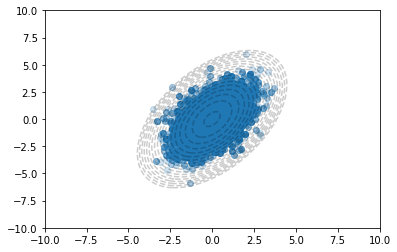

In [15]:
stacked = np.vstack(chains)
plt.figure()
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(stacked[:, 0], stacked[:, 1], alpha=0.2)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Now check how close the result is to the expected result, using the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback–Leibler_divergence), and compare this to the result from sampling independently.

In [16]:
print('KL divergence from MCMC: ' + str(log_pdf.kl_divergence(stacked)))
print('KL divergence from independent sampling: ' + str(log_pdf.kl_divergence(direct)))

KL divergence from MCMC: 0.000738239831645
KL divergence from independent sampling: 0.000253666857155


## Example with 20 dimensions

In [6]:
# Create log pdf
log_pdf = pints.toy.HighDimensionalGaussianLogPDF()

# Create an adaptive covariance MCMC routine
x0 = np.random.uniform(-25, 25, size=(3, 20))
mcmc = pints.MCMCSampling(log_pdf, 3, x0, method=pints.HaarioBardenetACMC)

# Stop after 10000 iterations
mcmc.set_max_iterations(10000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[5000:] for chain in chains]

Running...
Done!


KL divergence for MCMC now much worse than for independent sampling!

In [7]:
direct = log_pdf.sample(15000)
stacked = np.vstack(chains)

print('KL divergence from MCMC: ' + str(log_pdf.kl_divergence(stacked)))
print('KL divergence from independent sampling: ' + str(log_pdf.kl_divergence(direct)))

KL divergence from MCMC: 78.1367293465
KL divergence from independent sampling: 0.00773460333823
